<a href="https://colab.research.google.com/github/Linaqruf/model-spec-editor/blob/main/model-spec-editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Spec Editor**

## **Install Demo**

In [1]:
import os
import subprocess

ROOT_DIR = "/content"
REPO_DIR = os.path.join(ROOT_DIR, "model-spec-editor")

REPO_URL = "https://github.com/Linaqruf/model-spec-editor"

def clone_repo(url, dir):
    if not os.path.exists(dir):
        os.system(f"git clone {url} {dir}")

def install_deps():
    os.system("pip install huggingface_hub -r requirements.txt")

def main():
    os.chdir(ROOT_DIR)
    clone_repo(REPO_URL, REPO_DIR)
    os.chdir(REPO_DIR)
    install_deps()
    print("Installation Complete!")

main()


Installation Complete!


## **Download Model from Huggingface**

In [2]:
from huggingface_hub import hf_hub_download

# Download Model Example
hf_hub_download(
    repo_id="Linaqruf/watson-amelia-xl-lora",
    filename="watson_amelia_xl_lora.safetensors",
    local_dir=REPO_DIR,
    force_download=True,
    )

# Download Thumbnail Example
hf_hub_download(
    repo_id="Linaqruf/watson-amelia-xl-lora",
    subfolder="sample_images",
    filename="xl_output_upscaled_00012_.png",
    local_dir=REPO_DIR,
    force_download=True,
    )



'/content/model-spec-editor/sample_images/xl_output_upscaled_00012_.png'

## **Write Metadata**

Initializing metadata builder...
Loading checkpoint from: ./watson_amelia_xl_lora.safetensors...
Checkpoint loaded successfully.
Existing metadata found in model.
Metadata built successfully.
{'ss_bucket_no_upscale': 'False', 'ss_cache_latents': 'False', 'ss_output_name': 'amelia_lora_sdxl', 'ss_num_train_images': '200', 'ss_dataset_dirs': '{"meta_lat.json": {"n_repeats": 1, "img_count": 200}}', 'ss_zero_terminal_snr': 'False', 'ss_unet_lr': 'None', 'ss_gradient_accumulation_steps': '1', 'ss_max_bucket_reso': 'None', 'ss_reg_dataset_dirs': '{}', 'ss_full_fp16': 'False', 'ss_optimizer': 'transformers.optimization.Adafactor(scale_parameter=False,relative_step=False,warmup_init=False)', 'ss_max_token_length': '225', 'ss_min_bucket_reso': 'None', 'ss_bucket_info': '{"buckets": {"0": {"resolution": [448, 1024], "count": 3}, "1": {"resolution": [512, 1024], "count": 2}, "2": {"resolution": [576, 1024], "count": 12}, "3": {"resolution": [640, 1024], "count": 24}, "4": {"resolution": [704, 102
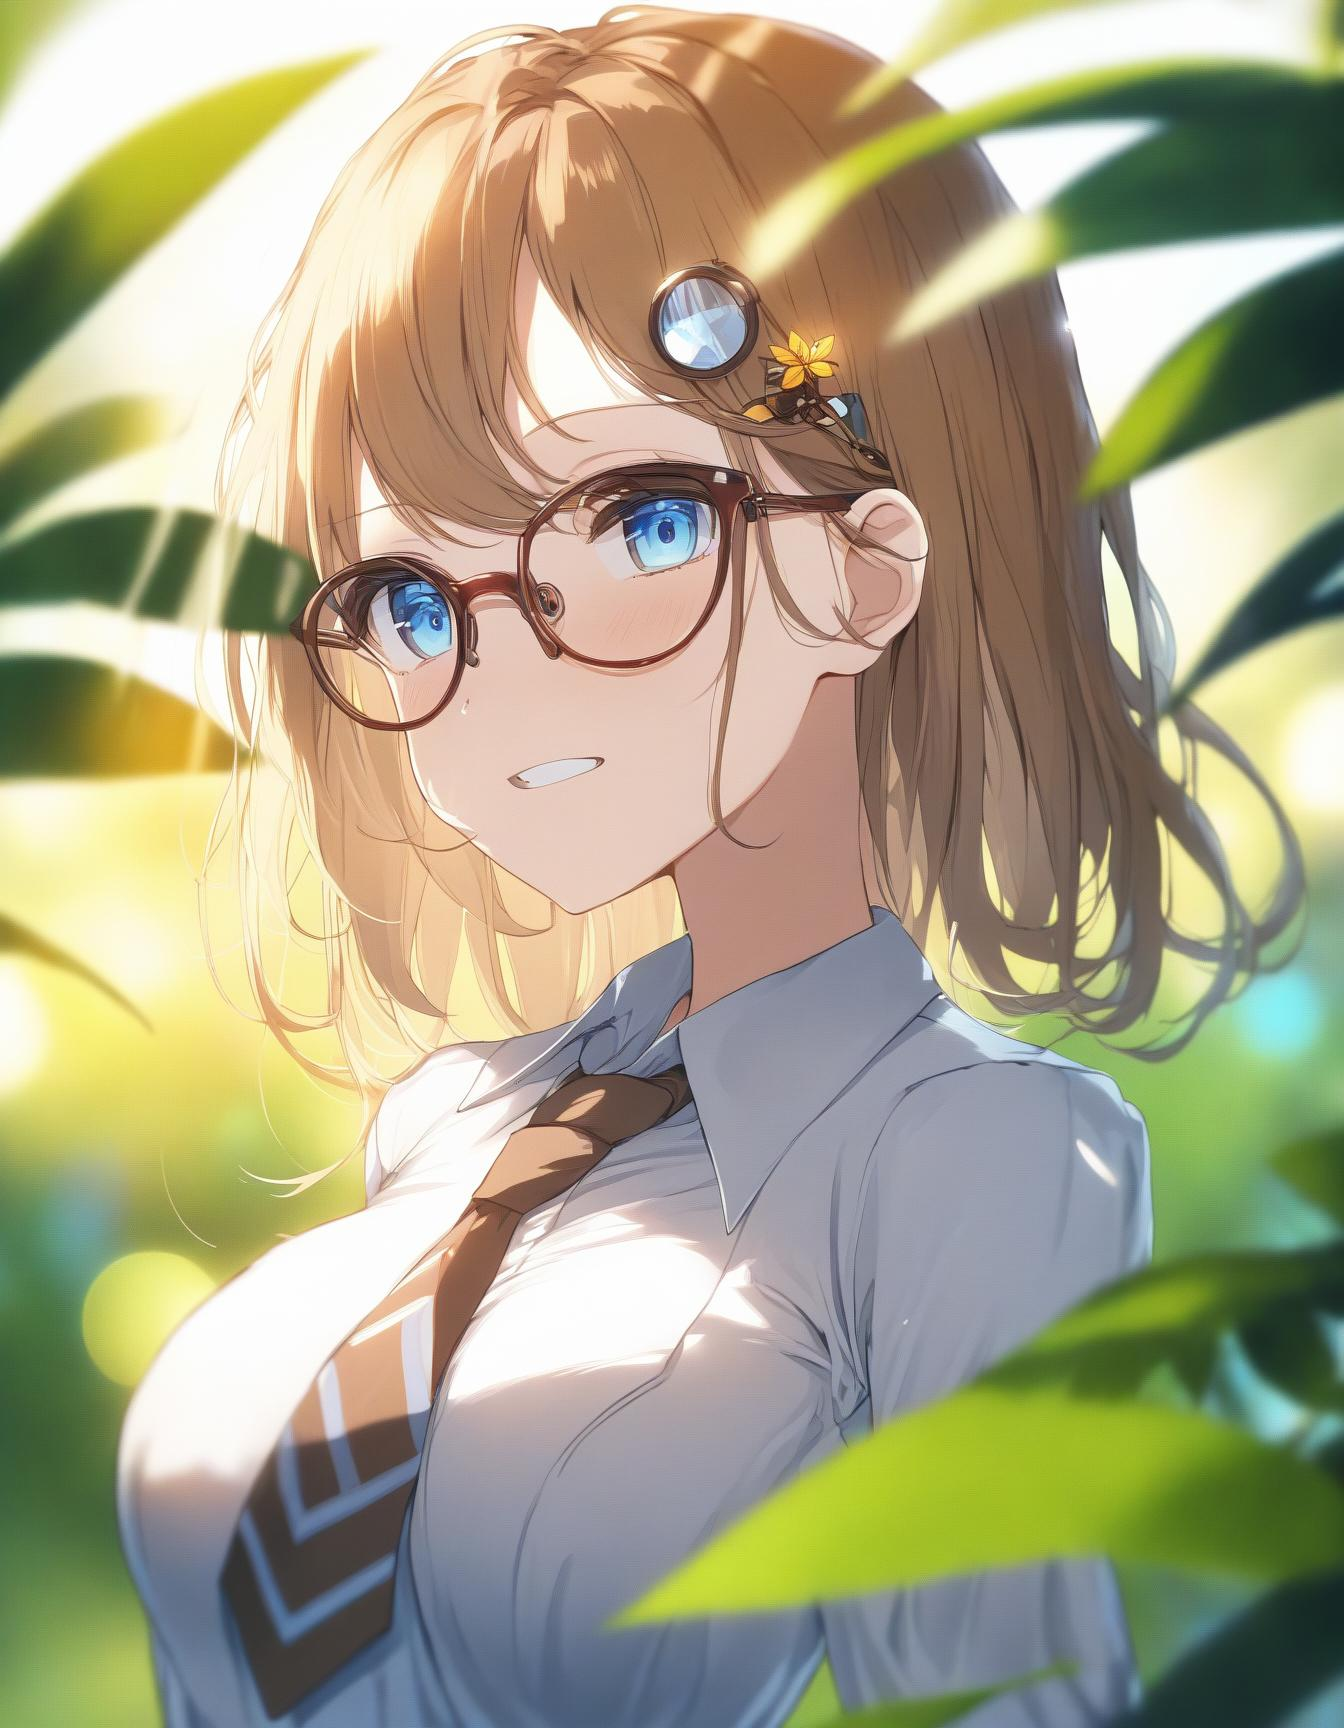

In [4]:
config = {
    "ckpt"            : "./watson_amelia_xl_lora.safetensors",
    "output_file"     : "./amelia_watson_xl.safetensors",
    "add_hash"        : True, # Set if you want to add your new model has to metadata
    "implementation"  : "stability_ai", # Set to 'stability_ai' or 'diffusers'
    "architecture"    : "sd_xl_v1_base", # Set to `sd_v1`, `sd_v2_512`, `sd_v2_768_v`, or `sd_xl_v1_base`
    "adapter"         : "lora", # Set to 'lora' or 'textual-inversion', set to None if checkpoint
    "title"           : "Amelia Watson LoRA", # Put model title here
    "description"     : "Amelia Watson, a charismatic time-traveling detective from the virtual realm of Hololive. Dive into her universe with this model featuring all her iconic outfits and complementary accessories. Use the generic 'amelia watson' tag to cater to diverse scenarios and imaginative requirements.",
    "author"          : "Linaqruf", # Put your name here
    "merged_from"     : None, # Set if the model is not fine-tuned but instead merged
    "license"         : "CreativeML Open RAIL++-M License",
    "tags"            : "anime, character, waifu, hololive",
    "usage_hint"      : "Recommended strength 70% (0.7). Use with ComfyUI, Automatic1111 and Diffusers library as SDXL LoRA adapter.",
    "trigger_phrase"  : "amelia watson, amelia_detective, amelia_casual, amelia_formal, amelia_kimono", # Leave it if the model don't have custom trigger
    "thumbnail"       : "./sample_images/xl_output_upscaled_00012_.png", # Set path to sample images to be used as thumbnail
    "prediction_type" : "epsilon",
    "timesteps"       : None, # Timesteps for the model, usage: `<min_timesteps>,<max_timesteps`
    "clip_skip"       : None, # Set if the model architecture is `sd_v1`
    "reso"            : "1024, 1024",
    "timestamp"       : "2023-08-18", # If not provided, the current time is used.
    "debug"           : False # If TRUE, it's only print the metadata instead of saving the model.
}

args = ""
for k, v in config.items():
    if k.startswith("_"):
        args += f'"{v}" '
    elif isinstance(v, str):
        args += f'--{k}="{v}" '
    elif isinstance(v, bool) and v:
        args += f"--{k} "
    elif isinstance(v, float) and not isinstance(v, bool):
        args += f"--{k}={v} "
    elif isinstance(v, int) and not isinstance(v, bool):
        args += f"--{k}={v} "

final_args = f"python model_spec_editor.py {args}"

os.chdir(REPO_DIR)
!{final_args}

## **Read Metadata**


Metadata for the model: amelia_watson_xl

modelspec.thumbnail            
modelspec.title                Amelia Watson LoRA
modelspec.date                 2023-08-18T00:00:00
modelspec.resolution           1024x1024
modelspec.usage_hint           Recommended strength 70% (0.7). Use with ComfyUI, Automatic1111 and Diffusers library as SDXL LoRA adapter.
modelspec.author               Linaqruf
modelspec.prediction_type      epsilon
modelspec.license              CreativeML Open RAIL++-M License
modelspec.tags                 anime, character, waifu, hololive
modelspec.trigger_phrase       amelia watson, amelia_detective, amelia_casual, amelia_formal, amelia_kimono
modelspec.sai_model_spec       1.0.0
modelspec.hash_sha256          0xcf5e77b46736c59da9f1edb0b8ce35c2fe5a94450416fe56393e15ae6c65cce0
modelspec.description          Amelia Watson, a charismatic time-traveling detective from the virtual realm of Hololive. Dive into her universe with this model featuring all her iconic outfits 
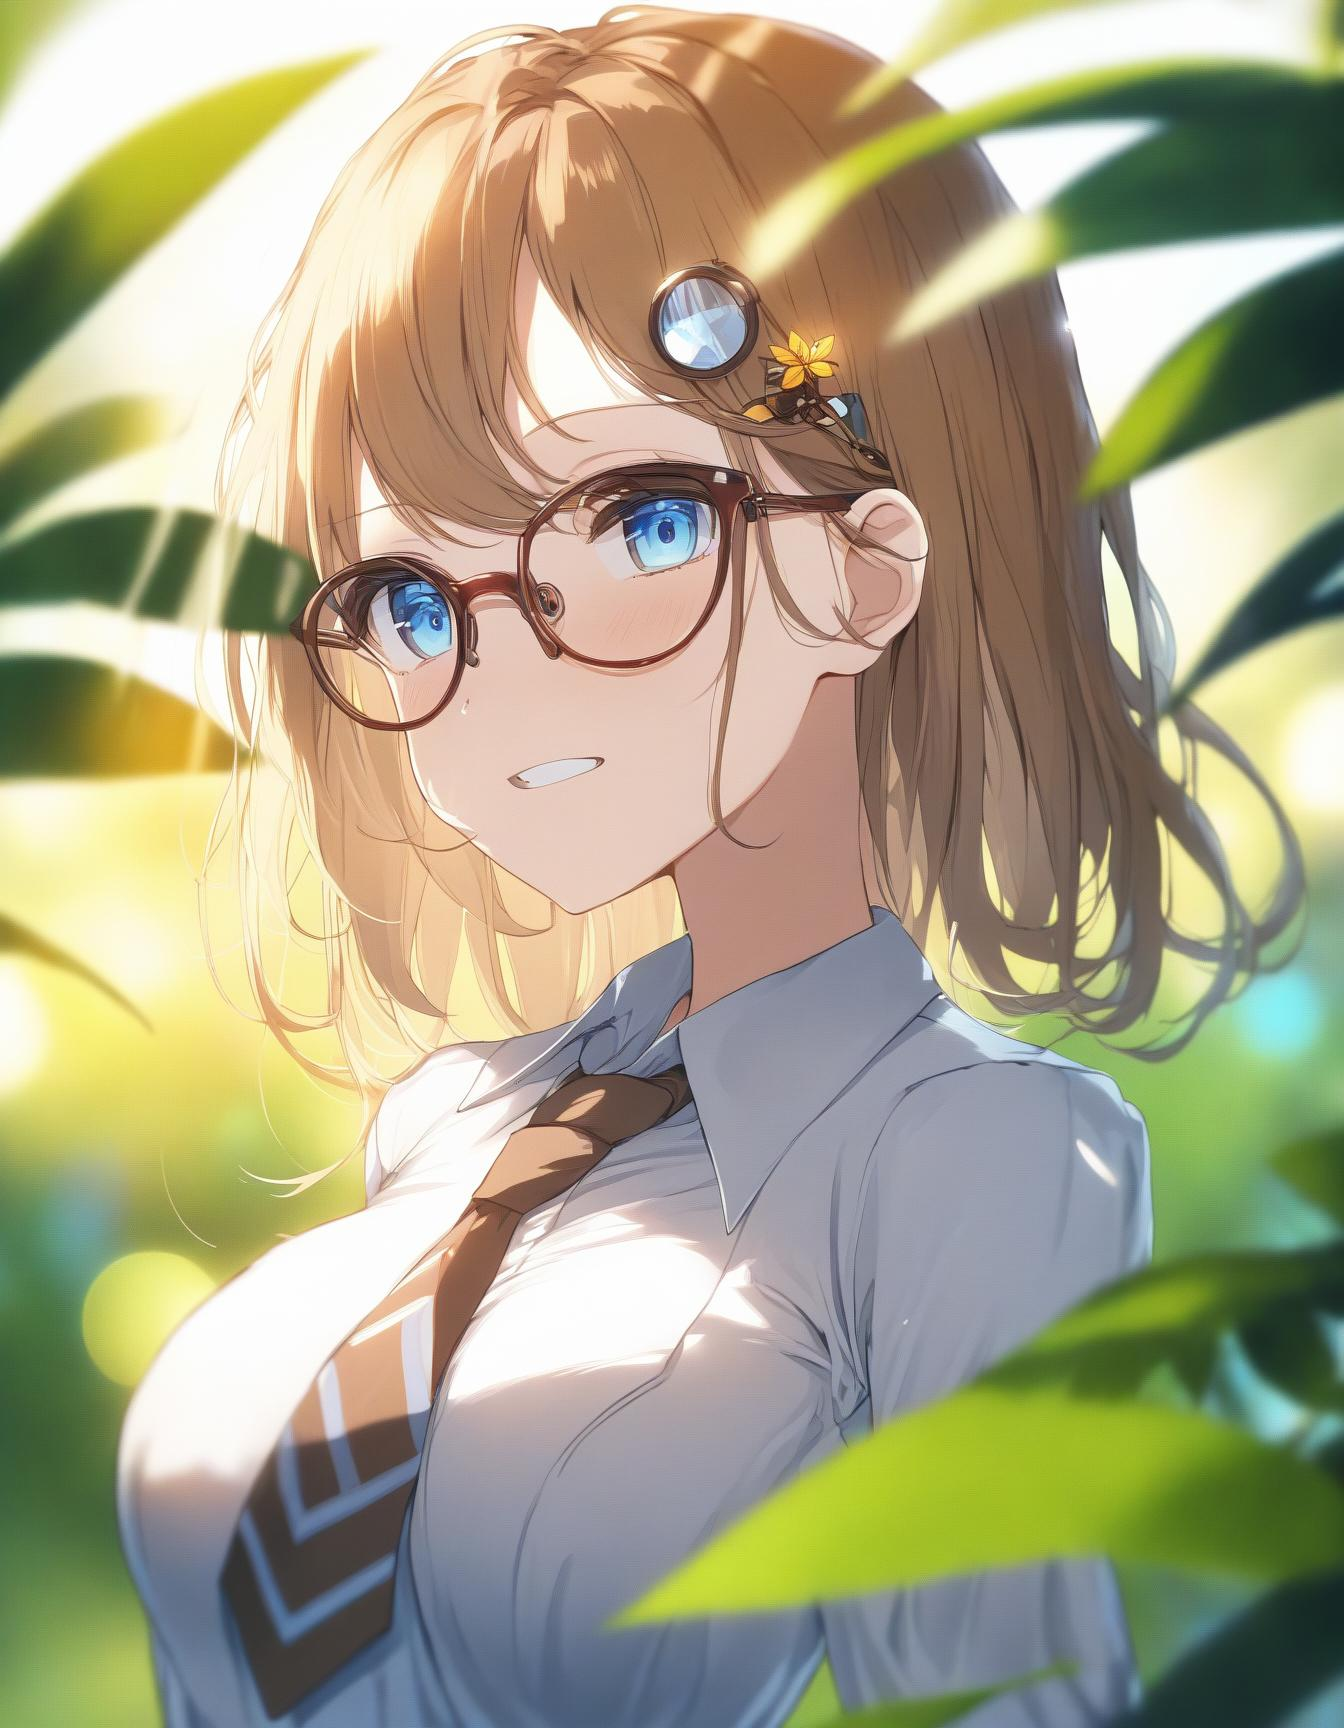

In [5]:
config = {
    "model_path"      : "./amelia_watson_xl.safetensors",
    "only_sai"        : True,
    "save_metadata"   : "toml",
    "save_thumbnail"  : True
}

args = ""
for k, v in config.items():
    if k.startswith("_"):
        args += f'"{v}" '
    elif isinstance(v, str):
        args += f'--{k}="{v}" '
    elif isinstance(v, bool) and v:
        args += f"--{k} "
    elif isinstance(v, float) and not isinstance(v, bool):
        args += f"--{k}={v} "
    elif isinstance(v, int) and not isinstance(v, bool):
        args += f"--{k}={v} "

final_args = f"python model_spec_reader.py {args}"

os.chdir(REPO_DIR)
!{final_args}